In [89]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from graphviz import Digraph

In [90]:
class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def relu(self):
    out = Value(max(0, self.data), (self,), 'relu')

    def _backward():
        self.grad += (1 if self.data > 0 else 0) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = -4.0646#1.0
    for node in reversed(topo):
      node._backward()

In [91]:
def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges


In [92]:
def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

**BIAS**

In [93]:
# bias de la primera hidden layer
b11 = Value(0.01, label='b11')  #(1era neurona)
b12 = Value(0.02, label='b12')  #(2da neurona)
b13 = Value(0.03, label='b13')  #(3era neurona)
b14 = Value(0.04, label='b14')  #(4ta neurona)

# bias de la segunda hidden layer
b21 = Value(0.05, label='b21')  #(1era neurona)
b22 = Value(0.06, label='b22')  #(2da neurona)
b23 = Value(0.07, label='b23')  #(3era neurona)
b24 = Value(0.08, label='b24')  #(4ta neurona)

# bias de la output layer
b31 = Value(0.1, label='b31')

**PESOS W1, W2 y W3**

In [94]:
W1 =[
    [0.1, -0.2, 0.3],
    [0.4, 0.5, -0.6],
    [-0.7, 0.8, -0.9],
    [0.2, -0.4, 0.6]]


W2 = [
    [0.2, 0.1, -0.3, 0.4],
    [-0.5, 0.6, -0.2, 0.3],
    [0.7, -0.8, 0.5, -0.4],
    [-0.1, 0.3, 0.2, -0.6]]


W3= [0.2, -0.3, 0.4, -0.5 ]

**INPUTS** **Xs**

In [95]:
Xs = [
    [2.5, 3.5, -0.5],
    [4.0, -1.0, 0.5],
    [0.5, 1.5, 1.0],
    [3.0, 2.0, -1.5]]

Tomamos la primera fila del INPUT

In [96]:
# inputs x1,x2,x3
x1 = Value(2.5, label='x1')
x2 = Value(3.5, label='x2')
x3 = Value(-0.5, label='x3')

**PRIMERA HIDDEN LAYER**

Forward propagation en el primer perceptron

In [97]:
# weights w11,w12,w13 of input layer (1era neurona)
w11 = Value(0.1, label='w11')
w12 = Value(-0.2, label='w12')
w13 = Value(0.3, label='w13')

x1w11 = x1*w11; x1w11.label = 'x1*w11'
x2w12 = x2*w12; x2w12.label = 'x2*w12'
x3w13 = x3*w13; x3w13.label = 'x3*w13'
z1 = x1w11 + x2w12; z1.label = 'z1 = x1*w11 + x2*w12'
z2 = z1 + x3w13; z2.label = 'z2 = x1*w11 + x2*w12 + x3*w13'
z3= z2 + b11; z3.label = 'z = x1*w11 + x2*w12 + x3*w13 + b11'
h11= z3.relu(); h11.label = 'h11 = relu(z)'
#draw_dot(h11)

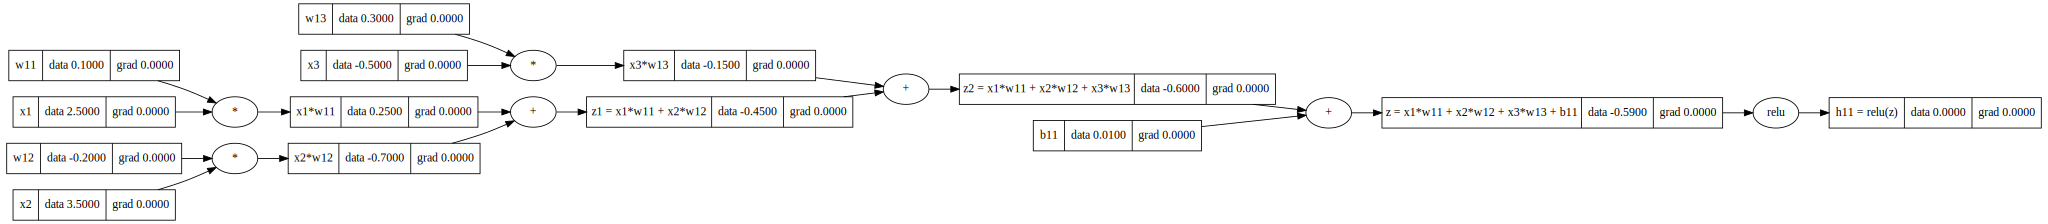

In [98]:
draw_dot(h11)

In [99]:
for node in trace(Y)[0]:
  node.grad = 0.0

In [100]:
h11.backward()

Forward propagation en el segundo perceptron

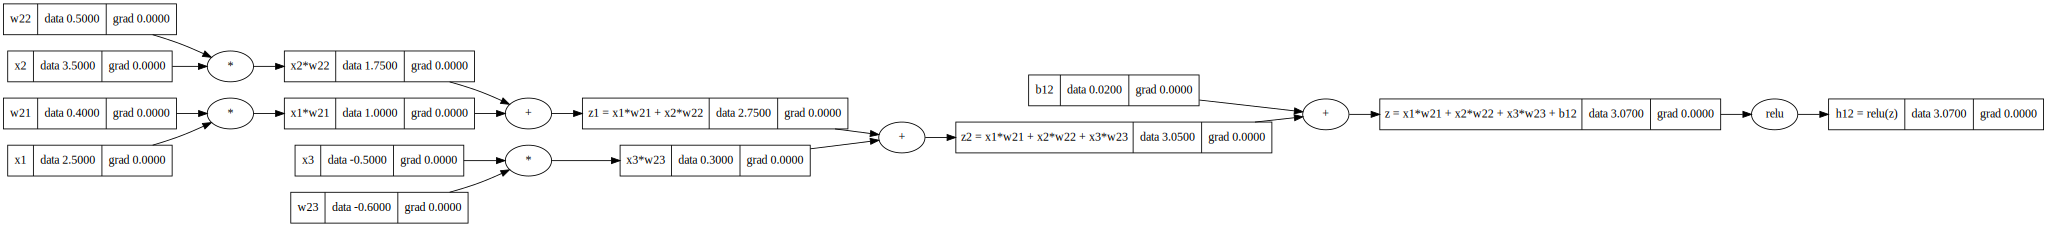

In [101]:
# weights w21,w22,w23 of input layer (2da neurona)
w21 = Value(0.4, label='w21')
w22 = Value(0.5, label='w22')
w23 = Value(-0.6, label='w23')

x1w21 = x1*w21; x1w21.label = 'x1*w21'
x2w22 = x2*w22; x2w22.label = 'x2*w22'
x3w23 = x3*w23; x3w23.label = 'x3*w23'
z1 = x1w21 + x2w22; z1.label = 'z1 = x1*w21 + x2*w22'
z2 = z1 + x3w23; z2.label = 'z2 = x1*w21 + x2*w22 + x3*w23'
z3= z2 + b12; z3.label = 'z = x1*w21 + x2*w22 + x3*w23 + b12'
h12= z3.relu(); h12.label = 'h12 = relu(z)'
draw_dot(h12)

Forward propagation en el tercer perceptron

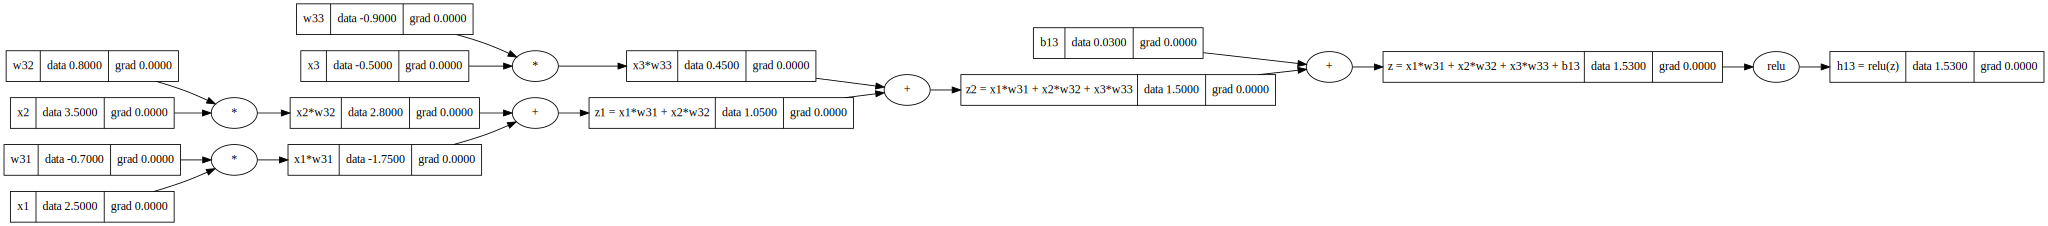

In [102]:
# weights w31,w32,w33 of input layer (3era neurona)
w31 = Value(-0.7, label='w31')
w32 = Value(0.8, label='w32')
w33 = Value(-0.9, label='w33')

x1w31 = x1*w31; x1w31.label = 'x1*w31'
x2w32 = x2*w32; x2w32.label = 'x2*w32'
x3w33 = x3*w33; x3w33.label = 'x3*w33'
z1 = x1w31 + x2w32; z1.label = 'z1 = x1*w31 + x2*w32'
z2 = z1 + x3w33; z2.label = 'z2 = x1*w31 + x2*w32 + x3*w33'
z3= z2 + b13; z3.label = 'z = x1*w31 + x2*w32 + x3*w33 + b13'
h13= z3.relu(); h13.label = 'h13 = relu(z)'
draw_dot(h13)

Forward propagation en el cuarto perceptron

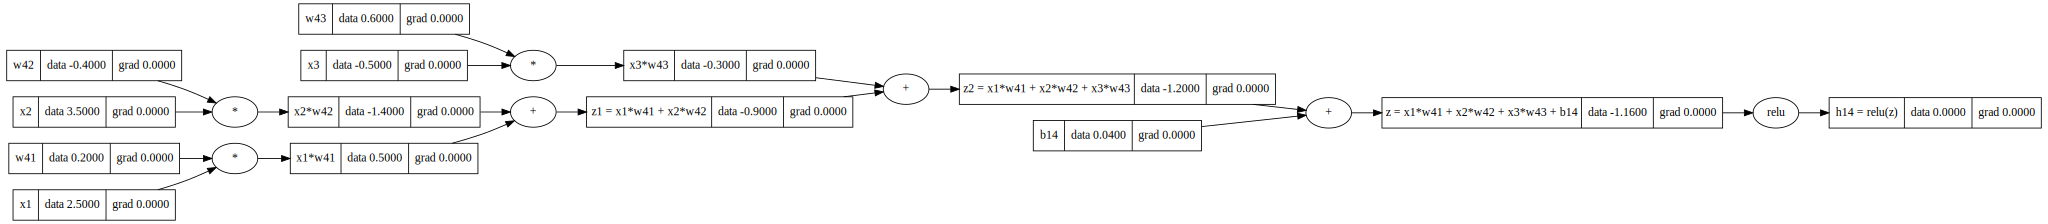

In [103]:
# weights w41,w42,w43 of input layer (4ta neurona)
w41 = Value(0.2, label='w41')
w42 = Value(-0.4, label='w42')
w43 = Value(0.6, label='w43')

x1w41 = x1*w41; x1w41.label = 'x1*w41'
x2w42 = x2*w42; x2w42.label = 'x2*w42'
x3w43 = x3*w43; x3w43.label = 'x3*w43'
z1 = x1w41 + x2w42; z1.label = 'z1 = x1*w41 + x2*w42'
z2 = z1 + x3w43; z2.label = 'z2 = x1*w41 + x2*w42 + x3*w43'
z3= z2 + b14; z3.label = 'z = x1*w41 + x2*w42 + x3*w43 + b14'
h14= z3.relu(); h14.label = 'h14 = relu(z)'
draw_dot(h14)

**SEGUNDA HIDDEN LAYER**

In [104]:
# Inputs de la hidden layer
h11, h12, h13, h14

(Value(data=0),
 Value(data=3.07),
 Value(data=1.5300000000000002),
 Value(data=0))

Forward propagation en el primer perceptron



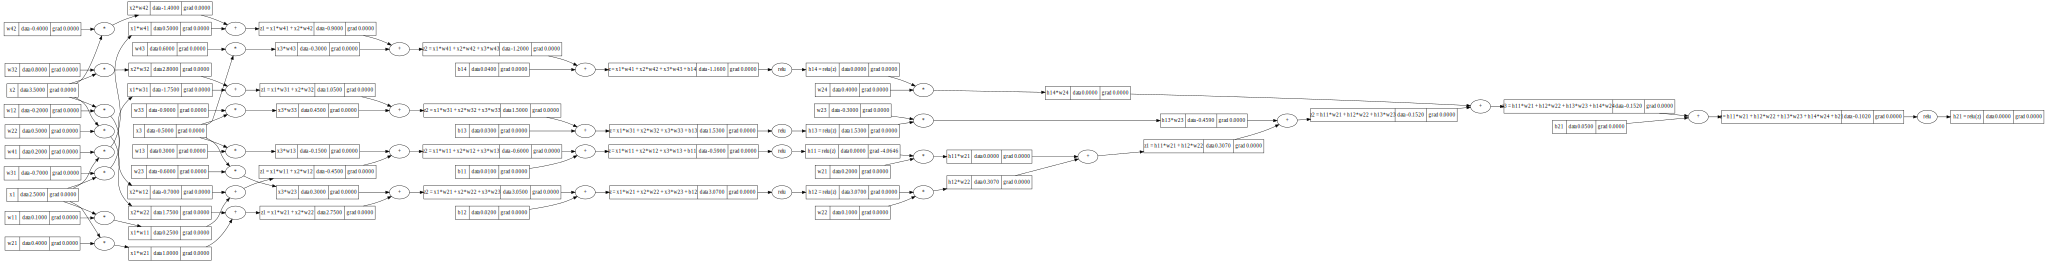

In [105]:
# weights w21,w22,w23,w24 of hidden layer (1era neurona)
w21 = Value(0.2, label='w21')
w22 = Value(0.1, label='w22')
w23 = Value(-0.3, label='w23')
w24 = Value(0.4 , label='w24')

h11w21 = h11*w21; h11w21.label = 'h11*w21'
h12w22 = h12*w22; h12w22.label = 'h12*w22'
h13w23 = h13*w23; h13w23.label = 'h13*w23'
h14w24 = h14*w24; h14w24.label = 'h14*w24'
z1 = h11w21 + h12w22; z1.label = 'z1 = h11*w21 + h12*w22'
z2 = z1 + h13w23; z2.label = 'z2 = h11*w21 + h12*w22 + h13*w23'
z3 = z2 + h14w24; z3.label = 'z3 = h11*w21 + h12*w22 + h13*w23 + h14*w24'
z4= z3 + b21; z4.label = 'z = h11*w21 + h12*w22 + h13*w23 + h14*w24 + b21'
h21= z4.relu(); h21.label = 'h21 = relu(z)'
draw_dot(h21)

In [106]:
h21

Value(data=0)

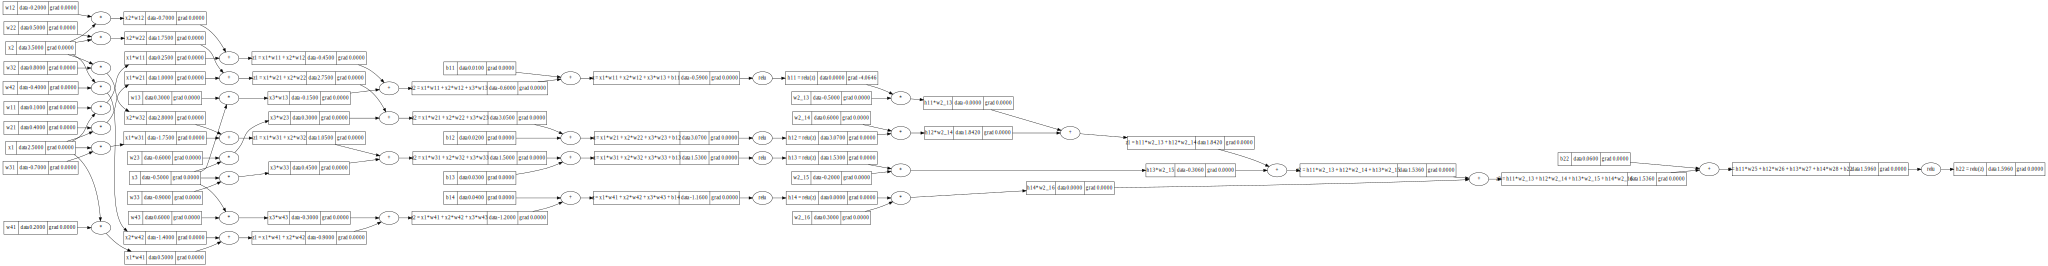

In [107]:
# weights w2_13,w2_14,w2_15,w2_16 of hidden layer (2da neurona)
w2_13 = Value(-0.5, label='w2_13')
w2_14 = Value(0.6, label='w2_14')
w2_15 = Value(-0.2, label='w2_15')
w2_16 = Value(0.3 , label='w2_16')

h11w2_13 = h11*w2_13; h11w2_13.label = 'h11*w2_13'
h12w2_14 = h12*w2_14; h12w2_14.label = 'h12*w2_14'
h13w2_15 = h13*w2_15; h13w2_15.label = 'h13*w2_15'
h14w2_16 = h14*w2_16; h14w2_16.label = 'h14*w2_16'
z1 = h11w2_13 + h12w2_14; z1.label = 'z1 = h11*w2_13 + h12*w2_14'
z2 = z1 + h13w2_15; z2.label = 'z2 = h11*w2_13 + h12*w2_14 + h13*w2_15'
z3 = z2 + h14w2_16; z3.label = 'z3 = h11*w2_13 + h12*w2_14 + h13*w2_15 + h14*w2_16'
z4= z3 + b22; z4.label = 'z = h11*w25 + h12*w26 + h13*w27 + h14*w28 + b22'
h22= z4.relu(); h22.label = 'h22 = relu(z)'
draw_dot(h22)

In [108]:
h22

Value(data=1.5959999999999999)

Forward propagation en el segundo perceptron

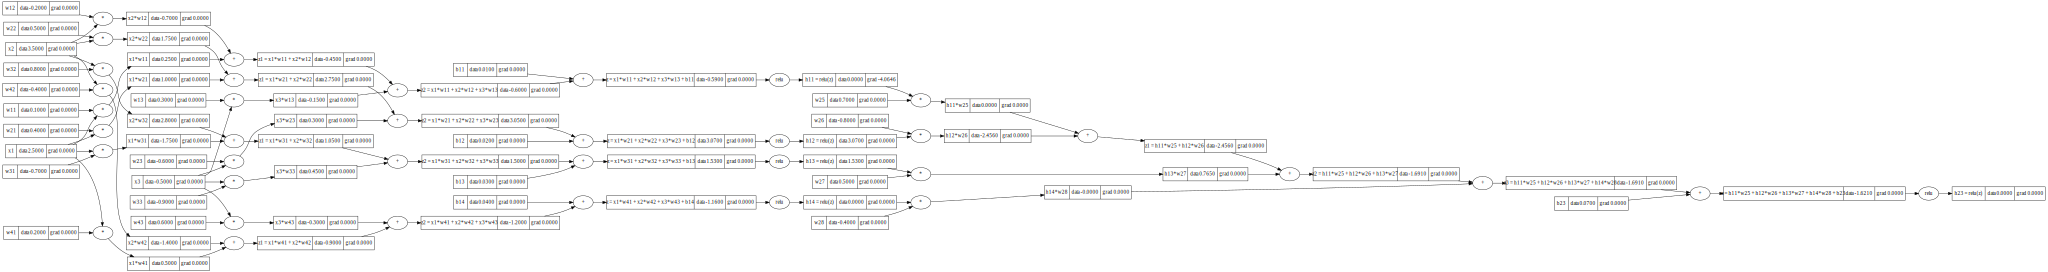

In [109]:
# weights w25,w26,w27,w28 of hidden layer (3ra neurona)
w25 = Value(0.7, label='w25')
w26 = Value(-0.8, label='w26')
w27 = Value(0.5, label='w27')
w28 = Value(-0.4, label='w28')

h11w25 = h11*w25; h11w25.label = 'h11*w25'
h12w26 = h12*w26; h12w26.label = 'h12*w26'
h13w27 = h13*w27; h13w27.label = 'h13*w27'
h14w28 = h14*w28; h14w28.label = 'h14*w28'
z1 = h11w25 + h12w26; z1.label = 'z1 = h11*w25 + h12*w26'
z2 = z1 + h13w27; z2.label = 'z2 = h11*w25 + h12*w26 + h13*w27'
z3 = z2 + h14w28; z3.label = 'z3 = h11*w25 + h12*w26 + h13*w27 + h14*w28'
z4= z3 + b23; z4.label = 'z = h11*w25 + h12*w26 + h13*w27 + h14*w28 + b23'
h23= z4.relu(); h23.label = 'h23 = relu(z)'
draw_dot(h23)

In [110]:
h23

Value(data=0)

Forward propagation en el cuarto perceptron

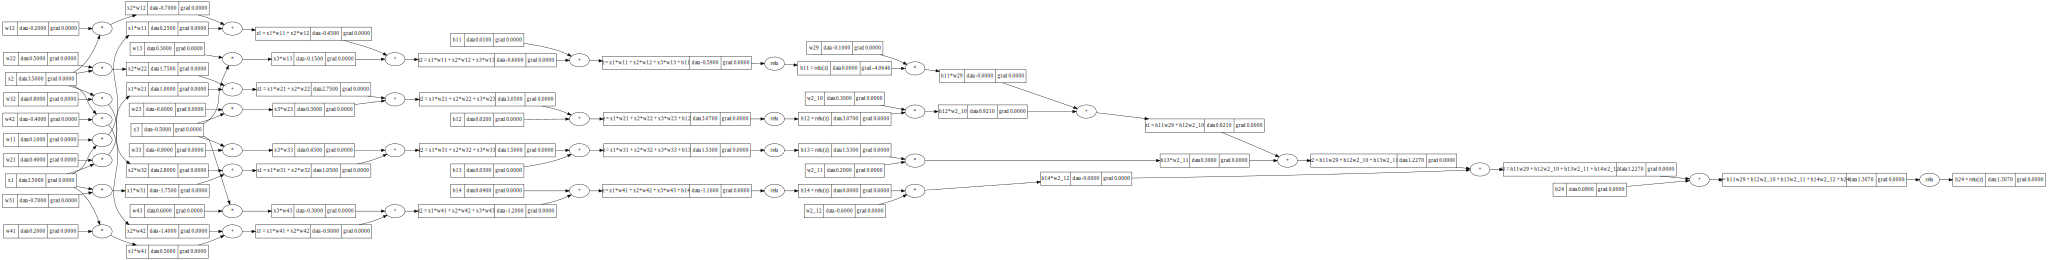

In [111]:
# weights w29,w2_10,w2_11,w2_12 of hidden layer (4ta neurona)
w29 = Value(-0.1, label='w29')
w2_10 = Value(0.3, label='w2_10')
w2_11 = Value(0.2, label='w2_11')
w2_12 = Value(-0.6 , label='w2_12')

h11w29 = h11*w29; h11w29.label = 'h11*w29'
h12w2_10 = h12*w2_10; h12w2_10.label = 'h12*w2_10'
h13w2_11 = h13*w2_11; h13w2_11.label = 'h13*w2_11'
h14w2_12 = h14*w2_12; h14w2_12.label = 'h14*w2_12'
z1 = h11w29 + h12w2_10; z1.label = 'z1 = h11w29 + h12w2_10'
z2 = z1 + h13w2_11; z2.label = 'z2 = h11w29 + h12w2_10 + h13w2_11'
z3 = z2 + h14w2_12; z3.label = 'z3 = h11w29 + h12w2_10 + h13w2_11 + h14w2_12'
z4= z3 + b24; z4.label = 'z = h11w29 + h12w2_10 + h13w2_11 + h14w2_12 + b24'
h24= z4.relu(); h24.label = 'h24 = relu(z)'
draw_dot(h24)

Forward propagation en el cuarto perceptron

In [112]:
h24

Value(data=1.307)

**OUTPUT LAYER**

In [113]:
# Inputs de la output layer
h21, h22, h23, h24

(Value(data=0),
 Value(data=1.5959999999999999),
 Value(data=0),
 Value(data=1.307))

Forward propagation en el ultimo perceptron

In [114]:
# weights w31, w32, w33, w34 of output layer (1era neurona)
w31 = Value(0.2, label='w31')
w32 = Value(-0.3, label='w32')
w33 = Value(0.4, label='w33')
w34 = Value(-0.5, label='w34')

h21w31 = h21*w31; h21w31.label = 'h21*w31'
h22w32 = h22*w32; h22w32.label = 'h22*w32'
h23w33 = h23*w33; h23w33.label = 'h23*w33'
h24w34 = h24*w34; h24w34.label = 'h24*w34'
z1 = h21w31 + h22w32; z1.label = 'z1 = h21*w31 + h22*w32'
z2 = z1 + h23w33; z2.label = 'z2 = h21*w31 + h22*w32 + h23*w33'
z3 = z2 + h24w34; z3.label = 'z3 = h21*w31 + h22*w32 + h23*w33 + h24*w34'
Y = z3 + b31; Y.label = 'Y = h21*w31 + h22*w32 + h23*w33 + h24*w34 + b31'
#Y= z4.relu(); Y.label = 'Y = relu(z)'
#draw_dot(z4)


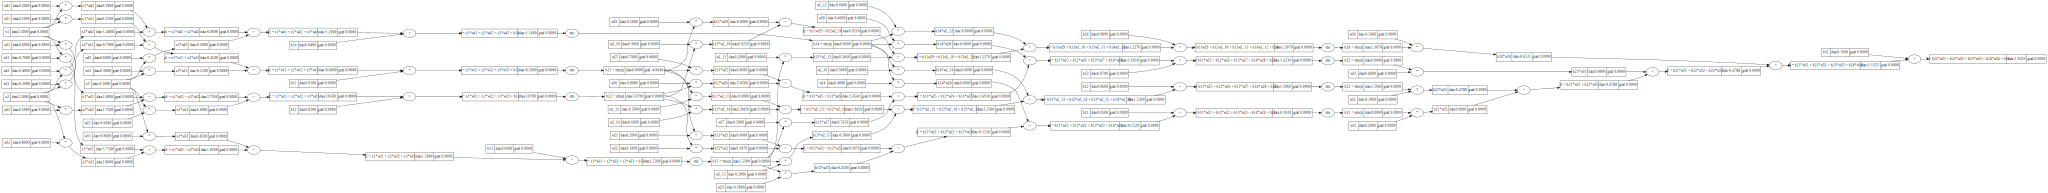

In [115]:
draw_dot(Y)

In [116]:
Y

Value(data=-1.0322999999999998)

Backward propagation

In [117]:
Y.backward()

**Funcion de error o coste**

E(Ys, Y) = (1/2n)*(Sum(Ys-Y)2)